# Równania różniczkowe i różnicowe

### W tym zeszycie rozwiązano problem nr. 5 - Potencjał elektryczny.

### Kod rozwiązania problemu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
global h
global ro

In [2]:
def eps_r(x):
    if 0 <= x <= 1:
        return 10
    elif 1 < x <= 2:
        return 5
    elif 2 < x <= 3:
        return 1
    return None


def integral(left_bound, right_bound, f, num=10**3):
    res = 0
    l = (right_bound - left_bound) / num
    for i in range(num):
        res += l * f(left_bound + l*(i+0.5))
    return res


def ei(i, x):
    if x < h * (i-1):
        return 0
    elif x < h*i:
        return x/h - (i-1)
    elif x < h * (i+1):
        return -x/h + (i+1)
    else:
        return 0


def d_ei(i, x):
    if x < h * (i-1):
        return 0
    elif x < h*i:
        return 1/h
    elif x < h * (i+1):
        return -1/h
    else:
        return 0


def B_value(j, i):
    if abs(j-i) > 1:
        return 0
    u0 = ei(j, 0)
    v0 = ei(i, 0)
    left_bound = max(h * (i-1), h * (j-1), 0)
    right_bound = min(h * (i+1), h * (j+1), 3)
    def f(x):
        return d_ei(j, x) * d_ei(i, x)
    return u0*v0 - integral(left_bound, right_bound, f)


def L_value(i):
    v0 = ei(i, 0)
    left_bound = max(h * (i-1), 0)
    right_bound = min(h * (i+1), 3)
    def f(x):
        return ro/eps_r(x) * ei(i, x)
    return 5*v0 - integral(left_bound, right_bound, f)


def L_final_value(i, n):
    return L_value(i) - 2*B_value(n, i)


def create_B_matrix(n):
    B = [[0 for _ in range(n)] for _ in range(n)]
    B[0][0] = B_value(0, 0)
    B[0][1] = B_value(1, 0)
    B[n-1][n-2] = B_value(n-2, n-1)
    B[n-1][n-1] = B_value(n-1, n-1)
    for i in range(1, n-1):
        for j in range(i-1, i+2):
            B[i][j] = B_value(j, i)
    return B


def create_L_matrix(n):
    L = [0 for _ in range(n)]
    for i in range(n):
        L[i] = L_final_value(i, n)
    return L


def get_solution(n):
    global h
    h = 3 / n
    global ro
    ro = 1

    B = np.array(create_B_matrix(n))
    L = np.array(create_L_matrix(n))
    U = np.linalg.solve(B, L)

    def get_y(x):
        res = 0
        for i in range(n):
            res += U[i] * ei(i, x)
        return res + 2*ei(n, x)

    X = [h*i for i in range(n+1)]
    Y = [get_y(x) for x in X]

    return X, Y

### Kod wyświetlania wykresu

In [3]:
def draw_plot(X, Y):
    plt.plot(X, Y, linestyle='-', color='black')
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.title('Wykres funkcji potencjału elektrycznego')
    plt.show()


### Wykresy poszukiwanej funkcji dla różnych n

[0.0, 0.3, 0.6, 0.8999999999999999, 1.2, 1.5, 1.7999999999999998, 2.1, 2.4, 2.6999999999999997, 3.0]
[5.97493999100002, 5.677957993700018, 5.371975996400016, 5.056993999100014, 4.731015999800012, 4.3875400025000095, 4.0260640052000065, 3.642571991900003, 3.185047994600001, 2.6375239972999998, 2.0]


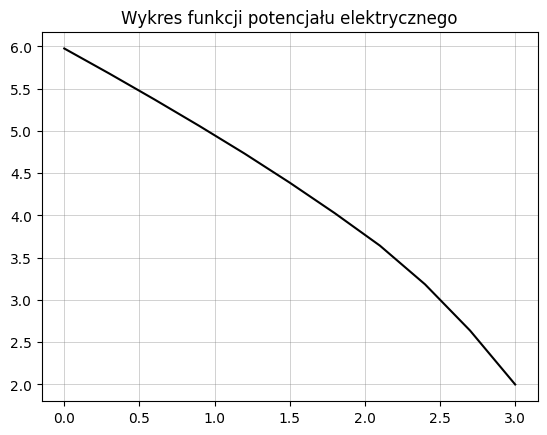

In [4]:
X10, Y10 = get_solution(10)
print(X10)
print(Y10)
draw_plot(X10, Y10)

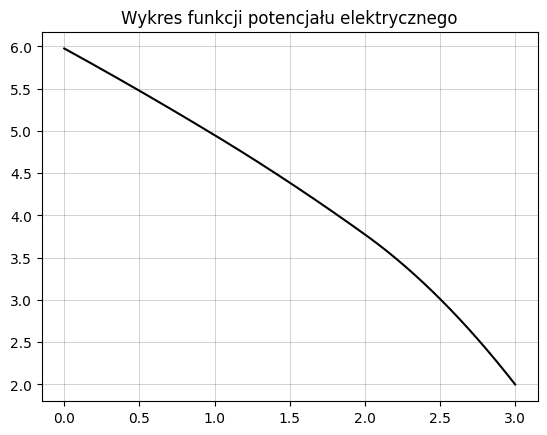

In [5]:
X500, Y500 = get_solution(500)
draw_plot(X500, Y500)

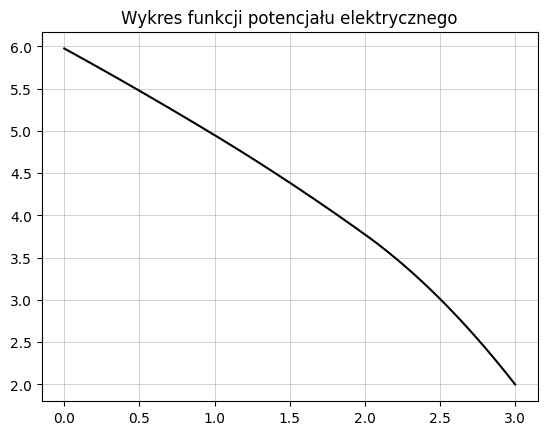

In [6]:
X1000, Y1000 = get_solution(1000)
draw_plot(X1000, Y1000)

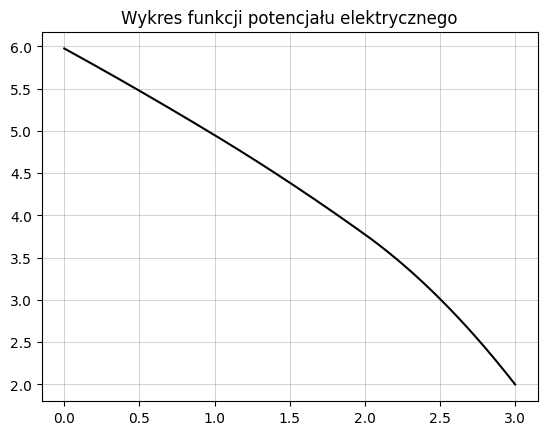

In [7]:
X8000, Y8000 = get_solution(8000)
draw_plot(X8000, Y8000)